In [ ]:
# Importing LIBRARIES
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
import os
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Specifying the path of the data(train,test,validaton)
train = '/content/drive/MyDrive/dataset.zip (Unzipped Files)/dataset/train'
test='/content/drive/MyDrive/dataset.zip (Unzipped Files)/dataset/test'

In [ ]:
#Here we are using tensorflow backend v  ,so we go for channel_last ie to specify the channel value as the last dimension in shape of the input.
img_width,img_height= 150,150
input_shape = (img_width,img_height,3)

In [ ]:
model=Sequential()

In [ ]:
#It’s just a thing function that you use to get the output of node. It is also known as Transfer Function.


model = Sequential()
# The number of filters are 32 and the kernal_size is (3,3)
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [ ]:
#Here we use RMSPROP optimizer and BINARY_CROSSENTROPY as loss function  
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_21 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)       

In [ ]:
#ImageDataGenerator-Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
batch_size = 16
train_datagen = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
# Here we import images directly from Directory by using flow_from_directory method.
#flow_from_directory() automatically infers the labels from the directory structure of the folders containing images
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')

Found 882 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [ ]:
#We Fit the model here using fit_generator as we are dealing with large datasets.
model.fit_generator(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=882 // 16,
    epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
55/55 [==============================] - 234s 4s/step - loss: 0.6982 - accuracy: 0.5173 - val_loss: 0.6899 - val_accuracy: 0.6224
Epoch 2/10
55/55 [==============================] - 45s 808ms/step - loss: 0.6682 - accuracy: 0.6420 - val_loss: 0.5853 - val_accuracy: 0.6294
Epoch 3/10
55/55 [==============================] - 45s 804ms/step - loss: 0.4323 - accuracy: 0.8164 - val_loss: 0.6167 - val_accuracy: 0.6434
Epoch 4/10
55/55 [==============================] - 45s 810ms/step - loss: 0.3996 - accuracy: 0.8349 - val_loss: 0.4690 - val_accuracy: 0.7972
Epoch 5/10
55/55 [==============================] - 45s 811ms/step - loss: 0.3242 - accuracy: 0.8718 - val_loss: 0.4330 - val_accuracy: 0.8042
Epoch 6/10
55/55 [==============================] - 45s 807ms/step - loss: 0.3041 - accuracy: 0.8730 - val_loss: 0.7429 - val_accuracy: 0.6643
Epoch 7/10
55/55 [==============================] - 45s 809ms/step - loss: 0.2924 - accuracy: 0.8818 - val_loss: 0.6988 - val_accuracy: 0.6294
E

In [ ]:
#Accuracy of test data.
test_acc = model.evaluate_generator(test_generator,143/16)
print("\nAccuracy:"+" %.2f%%" % ( test_acc[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '



Accuracy: 75.52%


In [ ]:
# saving model in H5 format.
model.save('pnemonia-1.h5')

In [ ]:
# saving model in Json format.
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

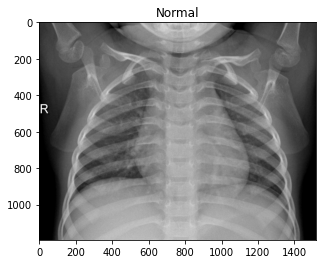

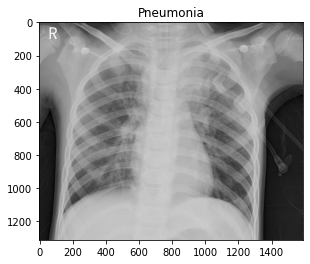

In [ ]:
# Displaying images of Normal and Pneumonia
img_n = load_img('/content/drive/MyDrive/dataset.zip (Unzipped Files)/dataset/train/NORMAL/NORMAL2-IM-0649-0001.jpeg')
plt.imshow(img_n)
plt.title("Normal")
plt.show()

img_p = load_img('/content/drive/MyDrive/dataset.zip (Unzipped Files)/dataset/train/PNEUMONIA/person101_virus_187.jpeg')
plt.imshow(img_p)
plt.title("Pneumonia")
plt.show()

In [ ]:
from keras.models import load_model
import numpy as np
import cv2
model = load_model('pnemonia.h5')
model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
from skimage.transform import resize

def detect(frame):
    try:
        img = resize(frame,(150,150))
        img = np.expand_dims(img,axis=0)
        #if(np.max(img)>1):
         #   img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction = model.predict_classes(img)
        print(prediction)
    except AttributeError:
        print("shape not found")

frame=cv2.imread("test.jpg")
data = detect(frame)

shape not found
